In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
import random
from sklearn.datasets import load_boston

In [17]:
boston = load_boston()
X = boston["data"]
Y = boston["target"]

In [18]:
X=np.insert(X,0,values=np.ones(X.shape[0]),axis=1)
X

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [1.0000e+00, 2.7310e-02, 0.0000e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [1.0000e+00, 2.7290e-02, 0.0000e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [1.0000e+00, 6.0760e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0000e+00, 1.0959e-01, 0.0000e+00, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [1.0000e+00, 4.7410e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [25]:
mask = np.random.rand(X.shape[0]) < 0.8

In [27]:
len(mask[mask == True])

417

In [29]:
X_train = X[mask]
X_test = X[~mask]

In [34]:
Y = Y.reshape(X.shape[0],1)
Y_train = Y[mask]
Y_test = Y[~mask]

In [45]:
def compute_cost(X, y, theta):
    
    m = y.size
    
    J = 0
    
    h = X.dot(theta)
    
    J = (1/(2*m))*np.sum(np.square(h-y))
    
    return(J)

In [177]:
def GD(X, y, alpha=0.000001, num_iters=1000):
    m = X.shape[0]
    J_hist = np.zeros(num_iters)
    
    theta = np.zeros((X.shape[1],1))
    
        
    for i in range(num_iters):
        h = X.dot(theta)
       # print(h)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        
        J_hist[i] = compute_cost(X, y, theta)
        if(i!=0 and J_hist[i] > J_hist[i-1]):
            print("error ,reduce alpha")
            J_hist = J_hist[0:i-1]
            break
    
    return (theta, J_hist)
    

In [178]:
theta, cost_J = GD(X_train, Y_train)

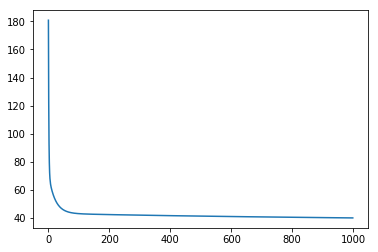

In [179]:
plt.plot(cost_J)

In [180]:
def predict(A,theta):
    return np.dot(A,theta)

In [184]:
predict(X_test, theta) - Y_test

array([[  0.98211048],
       [-12.20944216],
       [  1.49422949],
       [ -2.66647478],
       [  2.18757827],
       [  5.74764268],
       [  8.94398351],
       [  4.04339114],
       [  6.09489069],
       [ -1.16670644],
       [ -2.38031495],
       [  3.62575832],
       [  6.89177364],
       [  6.33580294],
       [  3.11678932],
       [  0.58281658],
       [ -0.89174765],
       [  2.40428898],
       [  1.18312888],
       [ -2.56499949],
       [  4.19258684],
       [  1.58310733],
       [  3.26340254],
       [  5.53402716],
       [ -3.65245857],
       [ -6.42523667],
       [ -5.84831608],
       [  1.10026878],
       [ -4.64602978],
       [ -4.38120608],
       [ -5.17683329],
       [ -1.6105796 ],
       [  1.87443545],
       [ -3.43449602],
       [ -5.02959432],
       [  2.2392747 ],
       [  1.91233876],
       [ -3.94147169],
       [-21.39803779],
       [ -8.63039454],
       [ -1.65055772],
       [ -0.80090747],
       [ -0.98809589],
       [ -5